# AdaBoost

AdaBoost is aka Adaptive Boosting. The most common base estimator of the **boosting methods** is the decision tree. Other classifier such as logistic classifier can be also used as the base estimator. Here we will see how these methods work using AdaBoosting as an example and a small data set.

It is also a ensemble method, but integrates some "well-selected" ensembles instead of random ensembles (e.g. random forest). AdaBoost iteratively generates new estimator based on the results of the previous estimator. **The samples that are not predicted correctly will gain more weight for the next estimator**.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [24]:
X = np.array([[0,0],[0,1],[1,3],[1,4],[2,5],[2,6],[3,7],[3,8],[3,4],[0,6]])
y = np.array([0,1,0,1,0,1,0,1,0,1])

n_samples = y.size
X1 = X[:,0];
X2 = X[:,1];

# build meshgrid
X1_test,X2_test = np.meshgrid(np.linspace(X1.min() - 1,X1.max() + 1,100),np.linspace(X2.min() - 1,X2.max() + 1,100))
X_test = np.vstack((X1_test.flatten(),X2_test.flatten())).T

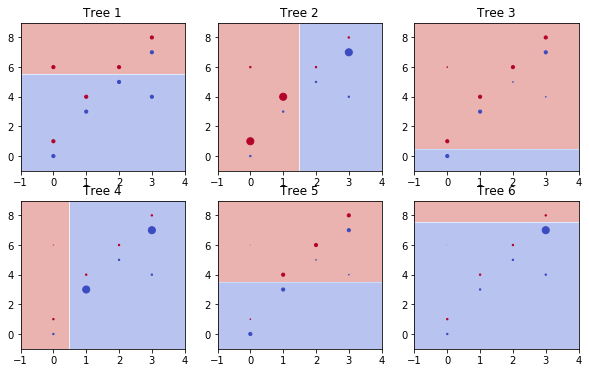

In [34]:
n_trees = 50
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=n_trees)

clf.fit(X,y)

sample_weights = 10*np.ones((n_samples,7))
plt.figure(figsize=(10,6))
for i in np.arange(6):
    
    clf_tree = clf.estimators_[i]
    
    y_test = clf_tree.predict(X_test)
    Y_test = y_test.reshape(X1_test.shape)
    
    plt.subplot(2,3,i+1)
    plt.contourf(X1_test, X2_test, Y_test,cmap=plt.cm.coolwarm,alpha=0.4)
    plt.scatter(X1,X2,s=sample_weights[:,i],c=y,cmap=plt.cm.coolwarm,edgecolor=None)
    plt.title('Tree {}'.format(i+1))
    
    # calculate the weight for the next estimator
    y_pred = clf_tree.predict(X)
    idx_right = np.equal(y_pred,y)
    idx_wrong = np.not_equal(y_pred,y)
    
    sample_weights[idx_right,i+1] = 0.2*sample_weights[idx_right,i]
    sample_weights[idx_wrong,i+1] = 5*sample_weights[idx_wrong,i]
    
plt.show()

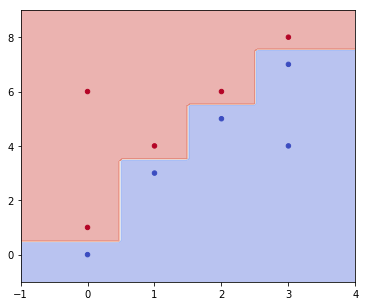

In [35]:
y_test = clf.predict(X_test)
Y_test = y_test.reshape(X1_test.shape)

plt.figure(figsize=(6,5))
plt.contourf(X1_test, X2_test, Y_test,cmap=plt.cm.coolwarm,alpha=0.4)
plt.scatter(X1,X2,c=y,s=20,edgecolor=None,cmap=plt.cm.coolwarm)
plt.show()